# 자연어처리시각화(과제)

네이버 뉴스에서  아래 조건을 만족하는 최소 5개 이상의 기사를  분석하고 빈도 기준 20개 단어를 워드 클라우드로 출력

- 4개 카테고리 중 1개 선택 : 정치/경제/사회/생활-문화 

- 동일한 카테고리에서  관련있는 최소 5개 이상의 기사 선택(예: 최근 5일간 보도된 관련 기사 5개 선택) 

   주의 1: 원본 기사를 메모장에 복사하거나, web scraping 등을 통해 웹에서 직접 가져와도 됨.

   주의 2: 같은 날짜의 경우 거의 유사한 내용 기사는 제외할 것. 다른 관점에서 보도한 기사는 가능.

- 전처리 포함(불용어 제거 포함). 

- 1차 시각화: 빈도분석 결과를 빈도 그래프로 출력

- 2차 시각화: 워드 클라우드로 빈도 기준 20개 단어 출력.

- 결과물 제출: 쥬피터 노트북 파일

- 분석 결과를 근거로 주피터 노트북 셀에 자신의 생각을 주석으로 첨가(최소 5줄 이상).

In [6]:
from konlpy.tag import Okt
from collections import Counter

## 불용어 처리 리스트 생성

In [7]:
twitter = Okt()
with open("kr_stopwords.txt") as f:
    raw_list = f.readlines()
stopword_list = [x.strip() for x in raw_list]

custom_stop_words = ["위해", "통해", "지금", "이번",
                     "한편", "이제", "뒤로", "것임", "이제", "바로"]
stopword_list.extend(custom_stop_words)


## 애플카 뉴스에 관한 소식 5가지

- news1~5까지의 기사내용을 text라는 리스트에 각각 요소로 저장

In [8]:
news_list = []
with open("news1") as news1, open("news2") as news2, open("news3") as news3, open("news4") as news4, open("news5") as news5:
    for news in (news1, news2, news3, news4, news5):
        temp_list =[x.strip() for x in news.readlines()]
        news_list.append("".join(temp_list))

## 전부 하나의 문자열로 통일

In [9]:
news = "".join(news_list)

## 전처리 과정 수행

- 한 글자 단어 제거
- 불용어 제거

In [10]:
law_container = Counter(twitter.nouns(news)) # 발생빈도 구함
law_container2 = Counter({x: law_container[x] for x in law_container if len(x) > 1}) # 한 글자 단어 제거


law_container3 = Counter({x: law_container2[x] for x in law_container2 if x not in stopword_list}) # 불용어 제거
law_container3.most_common(5)


[('애플', 76), ('생산', 27), ('전기차', 25), ('협력', 19), ('한국', 14)]

## 빈도 분석 그래프

### 한글 출력을 위한 font 지정

In [11]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc("font", family="AppleGothic")
plt.rcParams["axes.unicode_minus"] = False

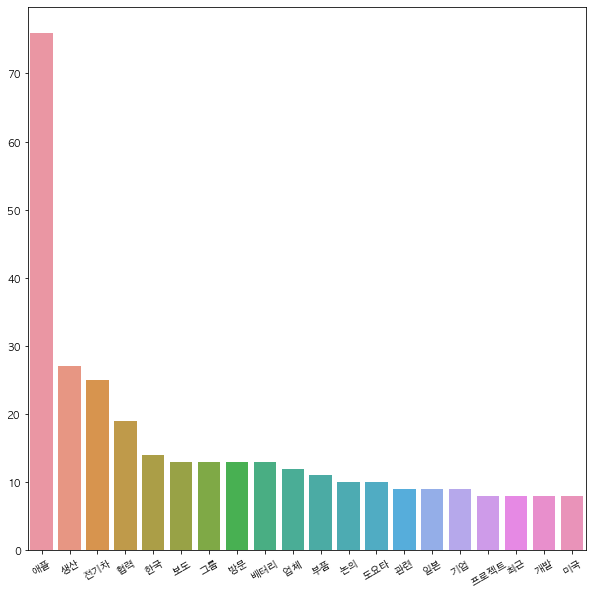

In [12]:
from nltk import FreqDist
import pandas as pd
import seaborn as sns


# 발생 빈도 40개 단어 선택
fdist = FreqDist(law_container3).most_common(20)

# 파이썬 dictionary 객체를 pandas의 Series객체로 변환

fdist = pd.Series(dict(fdist))

fig, ax = plt.subplots(figsize=(10, 10))

all_plot = sns.barplot(x=fdist.index, y=fdist.values, ax=ax)
_ = plt.xticks(rotation=30)


## 빈도 분석 wordcloud로 시각화

In [13]:
from wordcloud import WordCloud
wordcloud = WordCloud(font_path="./NanumGothic.ttf",
                      width=800,
                      height=800,
                      background_color="white")

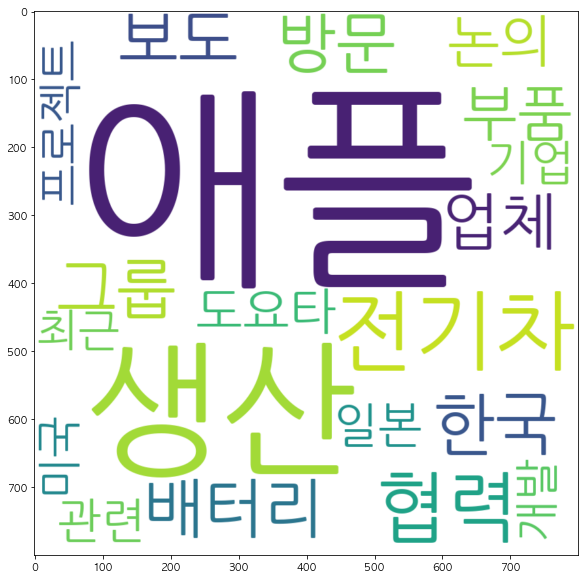

In [14]:
# 발생 빈도 순으로 20개 단어 선택
ranked_tags = dict(law_container3.most_common(20))
wordcloud = wordcloud.generate_from_frequencies(ranked_tags)  # 리스트를 dict로 변경

array = wordcloud.to_array() # nd.array

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.show()

# 분석 결과

가장 빈도가 많은 것은 **애플**이었고 그 뒤를 잇는 단어는 `생산`, `전기차`, `한국`, `협력`이다.  
애플은 전기차 생산을 위해 한국과 협력할 것이라 내리짐작할 수 있다. `배터리`, `부품`, `논의`를 보아 **배터리 업체와의 협력을 주도**하는 것으로 보인다.  
`도요타`, `일본`으로 **도요타기업과 접근**했으리라 생각할 수 있다.  
5개의 뉴스로만 빈도 분석을 하여 데이터가 작았음에도 충분히 뉴스의 내용이 어떨지 예상할 수 있다.  
조금 더 많은 뉴스를 첨부하여 진행했다면, 정확한 데이터 분석을 했을 수 있으나, 관련 뉴스가 현재 과제를 진행하고 있는 시점에 보도되고 있어서 유사한 내용을 제외해도 많은 기삿거리를 찾지 못했다.
